# Used to generate the balance plots in Figure 3, 4, 5, S6, S7, S8, as well as the secondary structure cartoons

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy import stats, optimize

import os
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from quad_model import *
from tensorflow.keras.models import Model, load_model
from  tqdm import tqdm

import mukund_utils as utils

import force_plot

random.seed(100)
np.random.seed(100)

plt.style.use('clean.mplstyle')

188/188 [==============================] - 18s 94ms/step


In [4]:
def get_mutation_names(list_o_exons, rna=False):
    assert len(list_o_exons) > 1
    if rna:
        list_o_exons = [e.replace('T', 'U') for e in list_o_exons]
    
    out = ['']
    
    base = list_o_exons[0]
    
    for exon in list_o_exons[1:]:
        tmp = []
        assert len(base) == len(exon)
        for i, (a, b) in enumerate(zip(base, exon)):
            if a != b:
                tmp.append(f'{i+1+3}{a}>{b}')  # add 3 here because of the 3 nucleotides in the beginning of the exon GTT
        out.append('\n'.join(tmp))
    return out

In [5]:
def add_subscript(a, b=''):
    return f'{a}\n{b}'

### Validation: c4, c3, c2, c10, c8

1/1 [==============================] - 0s 241ms/step


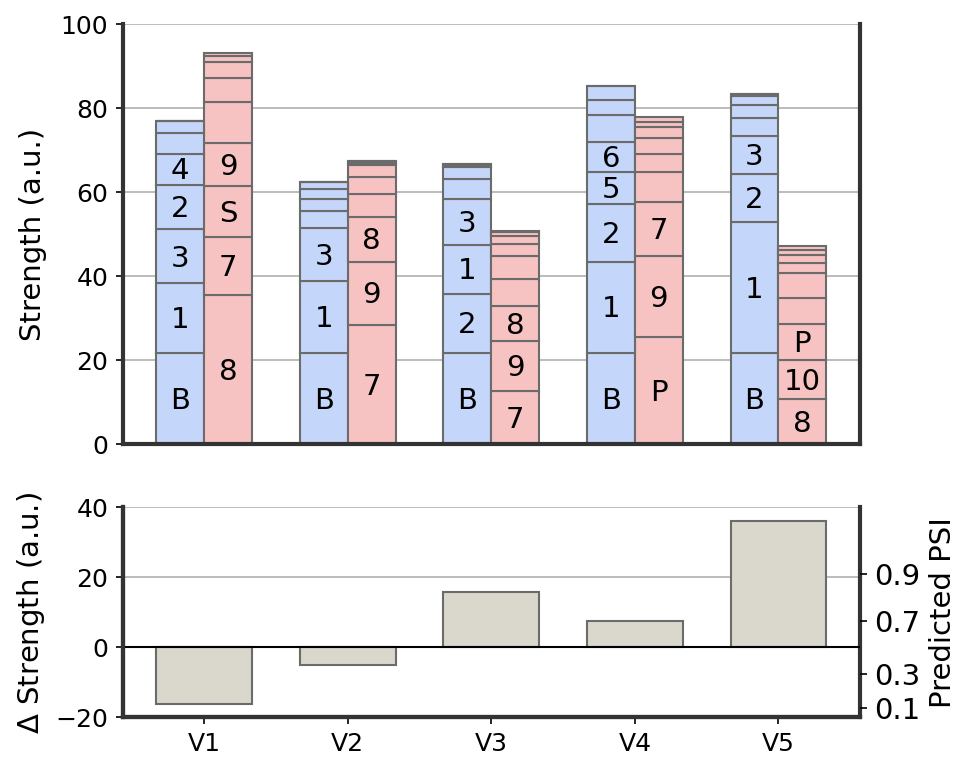

In [6]:
validation_exons = ['GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAATAGGGCGCCTATAGAGTGTAGTCCT',
                   'TCGCACCGCAGGTTCGGTTTTTTGGTATAATACGCGGCACTCCAAAATTACTCTGGGGCACCCTCACCAG',
                   'GCCCGAAAGCTCCCTACTGCAGTTTACGACCCTTAAGGCTTGGGTGCTCTTACGCGCTGATCGATATAAG',
                   'CCCTACCCGCCCTCGTCCCCAGGACACCCTTTCCGCCGCAAGTTATCCGCCAAGTACACAACTTAATGGT',
                   'GGTGTCCCCCACTATCGACCTCATCAGTAATCAATCCGAGCGACCGCCTCATCCCAAAGGCACACGTCCA'
                  ]

fig = force_plot.draw_force_plot([utils.add_flanking(x, 10) for x in validation_exons],
         [f'V{i}' for i in [1,2,3,4,5]],
         draw_numbers=True, 
         numbers_min_bar_height=7,
         ys=[0.1, 0.3, 0.7, 0.9, 0.975], height_ratios=[2, 1], delta_bar_width=2,
         vertical=True, sharex=True,
         vertical_adjustement=0.5,
         #parent_figure=fig,
         force_y_range=(0, 100), delta_force_y_range=(-20, 40),
         figsize=(6.34, 6)
        )

fig.savefig('./figs/V1-5.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')

### G poor balance plot (main text)

1/1 [==============================] - 0s 102ms/step


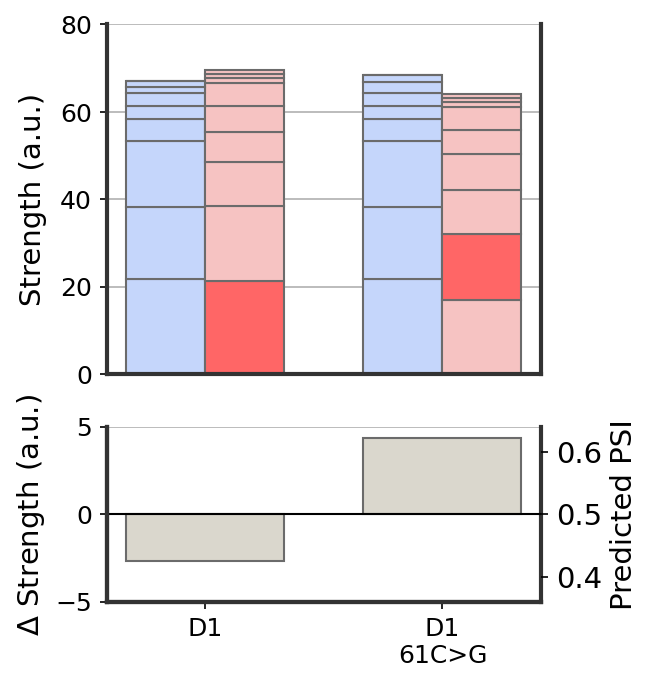

In [7]:

porg_exons = [
    'GACTATGAGCCCCAACGAACAAGCTCCTATCTGGGAACTCTTTTCTGCAGACTTTAACCCTACCCCCAGA',
    'GACTATGAGCCCCAACGAACAAGCTCCTATCTGGGAACTCTTTTCTGCAGACTTTAAGCCTACCCCCAGA'
]

prefix = 'D1'

annotations = [add_subscript(prefix, subscript) for subscript in get_mutation_names(porg_exons, rna=True)]

fig = force_plot.draw_force_plot([utils.add_flanking(x, 10) for x in porg_exons],
         annotations,
         draw_numbers=False, 
         numbers_min_bar_height=7,
         ys=[0.4, 0.5, 0.6, 0.7, 0.975], height_ratios=[2, 1], delta_bar_width=2,
         vertical=True, sharex=True,
         vertical_adjustement=0.5,
         highlight_forces = ['skip_struct_1'],
         force_y_range=(0, 80), delta_force_y_range=(-5, 5),
         figsize=(3.738, 5)
        )

fig.savefig('./figs/D1.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')

### Other G-poor (supplement)

In [11]:
porg_exon_sets = [
    ["CCGTGGTCCAACACTCCGATTATATCCCTACTCCCGTTATGTGTTAAGACTCAAGTTCCTCTCTATCCAC",
     "CCGTGGTCCAACACTCCGATTATATCGCTACTCCCGTTATGTGTTAAGACTCAAGTTCCTCTCTATCCAC", ],
    ["CTCCCAGTCACACGCAGTCTCCGCCTAACTTCATAGTCTCATGTCATATCTTCTTAAGCTGCCGTGCCAC",
     "CTCCCAGTCACACGCAGTCTCCGCCTAACTTCATAGTCTCATGTGATATCTTCTTAAGCTGCCGTGCCAC", ],
    ["ACGCCCCCCACCCTCACCGACATATAATTGCCCTTCCCGCAGTATGCTTCAGTTAACGATACTACAGTTC",
     "ACGCCCCCCACCCTCACCGACATATAATTGGCCTTCCCGCAGTATGCTTCAGTTAACGATACTACAGTTC", ]]

In [12]:
filename_prefixes = ['D2', 'D3', 'D4']
annotation_sets = [[add_subscript(fp, subscript) for subscript in get_mutation_names(porg_exons, rna=True)]
                   for fp, porg_exons in zip(filename_prefixes, porg_exon_sets)]

1/1 [==============================] - 0s 93ms/step


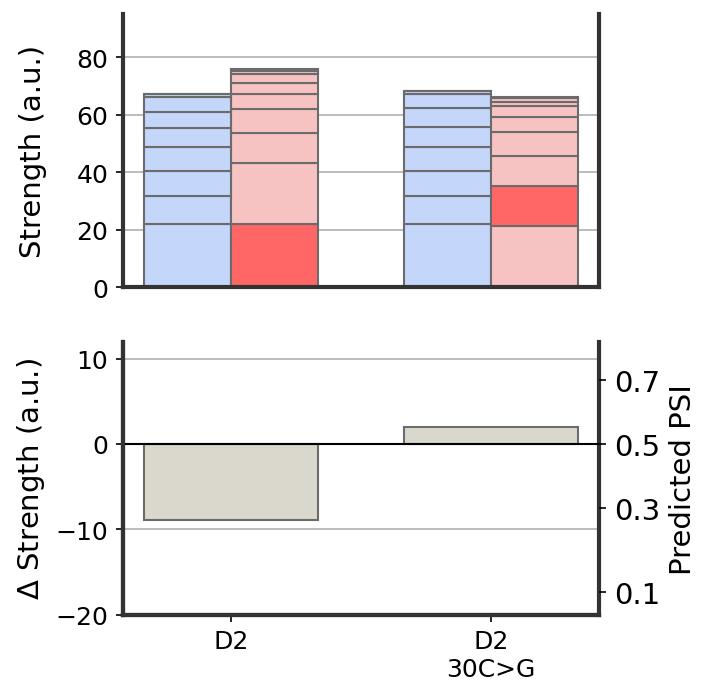

1/1 [==============================] - 0s 172ms/step


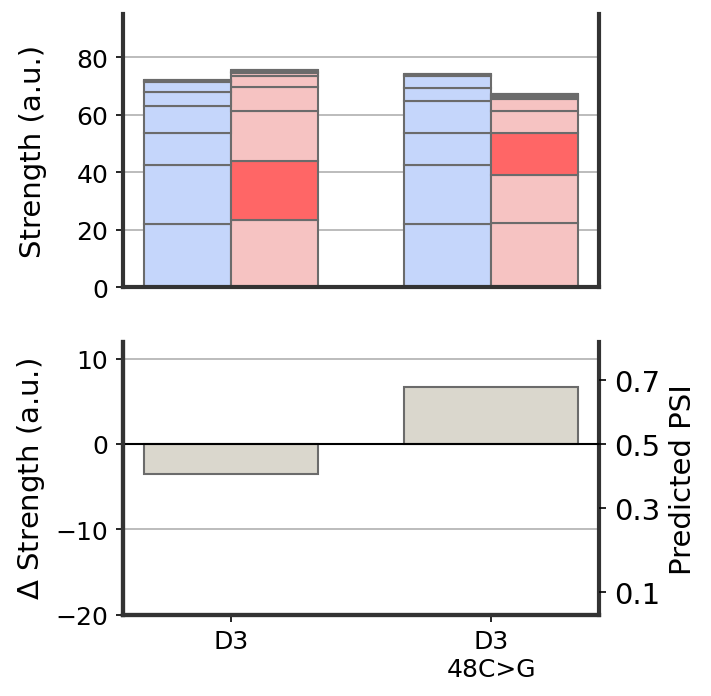

1/1 [==============================] - 0s 86ms/step


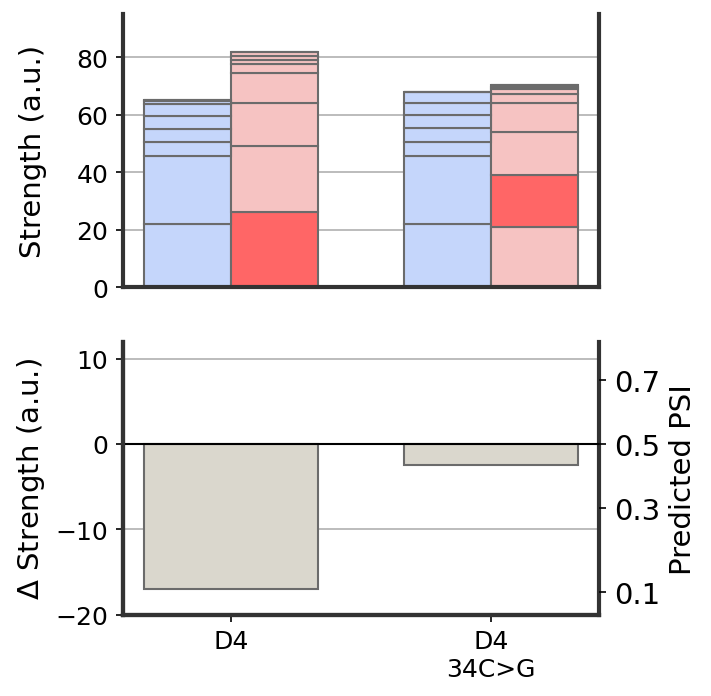

In [21]:
for porg_exons, annotations, filename_prefix in zip(porg_exon_sets, annotation_sets, filename_prefixes):

    fig = force_plot.draw_force_plot([utils.add_flanking(x, 10) for x in porg_exons],
                                 annotations,
                                 draw_numbers=False, 
                                 numbers_min_bar_height=7,
                                 delta_force_y_range=(-20, 12), force_y_range=(0, 95),
                                 ys=[0.1, 0.3, 0.5, 0.7], delta_bar_width=2.0, width_ratios=[2, 2],
                                 vertical=True, figsize=(4.1, 5.2), sharex=True,
                                 highlight_forces = ['skip_struct_1']
                                )

    fig.savefig(f'./figs/{filename_prefix}.svg',
                transparent=True, pad_inches=0.1,
        bbox_inches='tight')
    plt.show()

### structure sequences 2c1 (main paper), 2c4, 2c5, 2c7, 2c8 (supplement)

In [22]:
structure_exon_sets = [
    [ # 2c1 (S1)
        'GAGTCCCGCTTACCATTGCATTTAAGAAAGCGGCCATACGCCGCTAAGACCCTACTCTTCAGAATACCAG',
        'GAGTCCCGCTTACCATTGCATTTAAGAAAGAGGCCATACGCCGCTAAGACCCTACTCTTCAGAATACCAG',
        'GAGTCCCGCTTACCATTGCATTTAAGAAAGCGGCCATACGCCTCTAAGACCCTACTCTTCAGAATACCAG',
        'GAGTCCCGCTTACCATTGCATTTAAGAAAGAGGCCATACGCCTCTAAGACCCTACTCTTCAGAATACCAG',
    ], [ # 2c4  (S2)
        'TCGCTCTCTAAAAAAGTCACCTACTTAACACGACGTGCCTCCGTGGCACGAAAATAAACCACTAAGAAAA',
        'TCGCTCTCTAAAAAAGTCACCTACTTAACACGACGGGCCTCCGTGGCACGAAAATAAACCACTAAGAAAA',
        'TCGCTCTCTAAAAAAGTCACCTACTTAACACGACGTGCCTCCGTGGCCCGAAAATAAACCACTAAGAAAA',
        'TCGCTCTCTAAAAAAGTCACCTACTTAACACGACGGGCCTCCGTGGCCCGAAAATAAACCACTAAGAAAA',
    ], [ # 2c5  (S3)
        'TCTGCCCCTACACACAGGCACCTCGGCGATCGCCCGGGACACATCCGGGCCCTTGTTTCTATTCCGCCTC',
        'TCTGCCCCTACACACAGGCACCTCGGCGATCGCCAGGGACACATCCGGGCCCTTGTTTCTATTCCGCCTC',
        'TCTGCCCCTACACACAGGCACCTCGGCGATCGCCCGGGACACATCCTGGCCCTTGTTTCTATTCCGCCTC',
        'TCTGCCCCTACACACAGGCACCTCGGCGATCGCCAGGGACACATCCTGGCCCTTGTTTCTATTCCGCCTC',
    ], [ # 2c7 (S4)
        'AGATCAGAACACCCACTACATCATGGCCACGCGCCTGGCACTACGCCAGGGTCTAAAGACCAATCCATTC',
        'AGATCAGAACACCCACTACATCATGGCCACGCGCCGGGCACTACGCCAGGGTCTAAAGACCAATCCATTC',
        'AGATCAGAACACCCACTACATCATGGCCACGCGCCTGGCACTACGCCCGGGTCTAAAGACCAATCCATTC',
        'AGATCAGAACACCCACTACATCATGGCCACGCGCCGGGCACTACGCCCGGGTCTAAAGACCAATCCATTC'
    ], [ #2c8 (S5)
        'AACACCCAAACATACTGACAGCAAGGTCCTCATATGCCCGCGCTCCGCTTAAGGCGGACGTTACAGATTA',
        'AACACCCAAACATACTGACAGCAAGGTCCTCATATGCCCGCGCTCAGCTTAAGGCGGACGTTACAGATTA',
        'AACACCCAAACATACTGACAGCAAGGTCCTCATATGCCCGCGCTCCGCTTAAGGCTGACGTTACAGATTA',
        'AACACCCAAACATACTGACAGCAAGGTCCTCATATGCCCGCGCTCAGCTTAAGGCTGACGTTACAGATTA'
    ], [ # 2c9  (not used)
        'GGACCCCGATAGAATTACCCATATCGCGAACGCCTAATGGCGTTCAGATTCTGGCAGGTGAACGTTCTAT',
        'GGACCCCGATAGAATTACCCATATCGCGAAAGCCTAATGGCGTTCAGATTCTGGCAGGTGAACGTTCTAT',
        'GGACCCCGATAGAATTACCCATATCGCGAACGCCTAATGGCTTTCAGATTCTGGCAGGTGAACGTTCTAT',
        'GGACCCCGATAGAATTACCCATATCGCGAAAGCCTAATGGCTTTCAGATTCTGGCAGGTGAACGTTCTAT'
    ], [ # 2c10  (not used)
        'CGCACCTACTACACCAGGTTGCGCGTCGGGACCAATACTGGTCCCAAGGTTTCACGCATTACCAAACACT',
        'CGCACCTACTACACCAGGTTGCGCGTCGGGCCCAATACTGGTCCCAAGGTTTCACGCATTACCAAACACT',
        'CGCACCTACTACACCAGGTTGCGCGTCGGGACCAATACTGGGCCCAAGGTTTCACGCATTACCAAACACT',
        'CGCACCTACTACACCAGGTTGCGCGTCGGGCCCAATACTGGGCCCAAGGTTTCACGCATTACCAAACACT'
    ], 
]

filename_prefixes = ['S1','S2', 'S3', 'S4', 'S5', '2c9', '2c10']

# Only first five are actually used in the paper
structure_exon_sets = structure_exon_sets[:5]
filename_prefixes = filename_prefixes[:5]

annotation_sets = [[add_subscript(fp, subscript) for subscript in get_mutation_names(structure_exons, rna=True)]
                   for fp, structure_exons in zip(filename_prefixes, structure_exon_sets)]


1/1 [==============================] - 0s 86ms/step


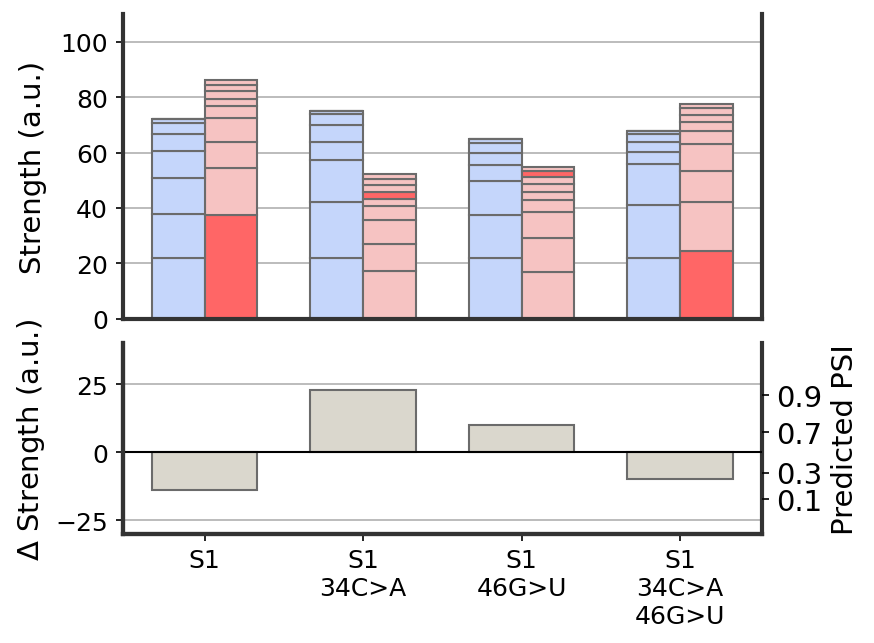

1/1 [==============================] - 0s 86ms/step


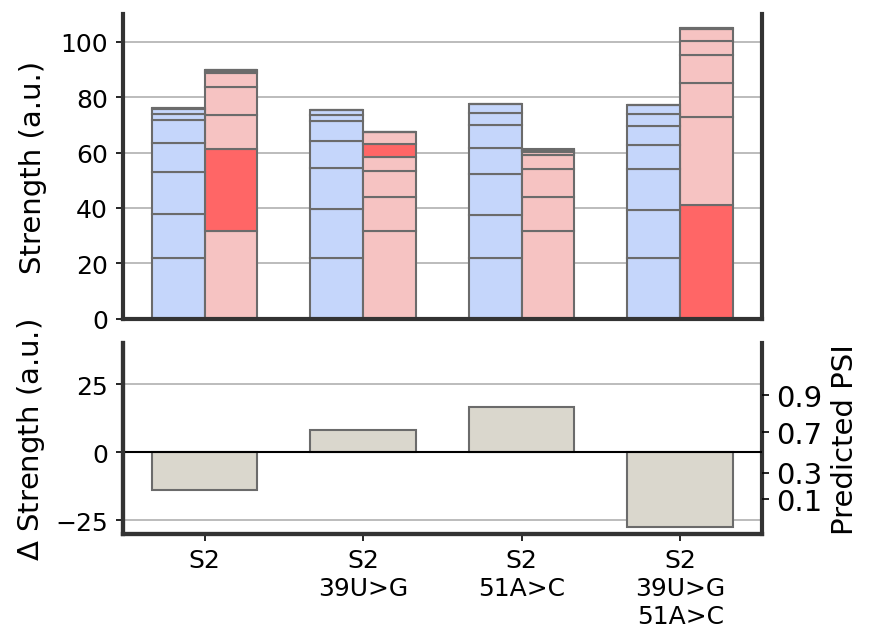

1/1 [==============================] - 0s 87ms/step


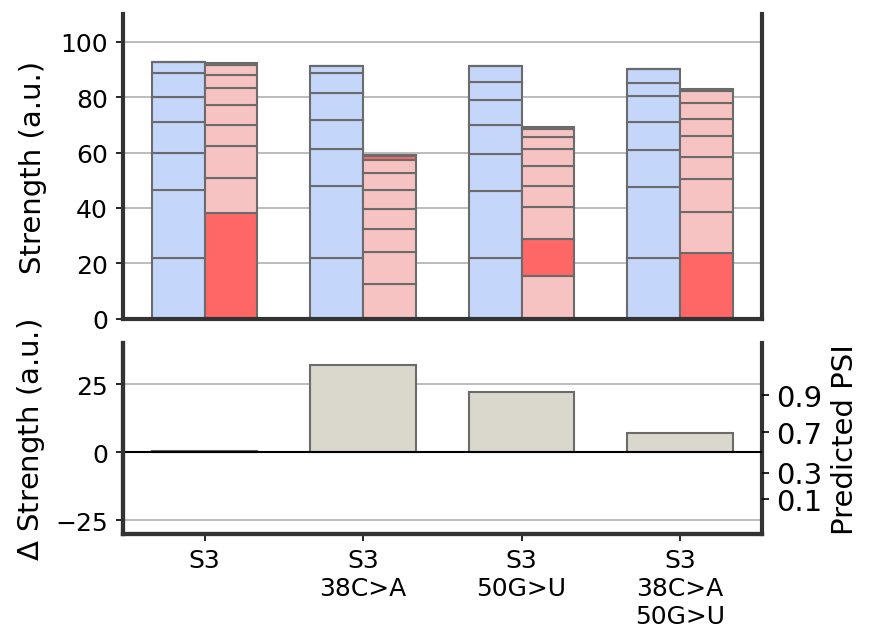

1/1 [==============================] - 0s 84ms/step


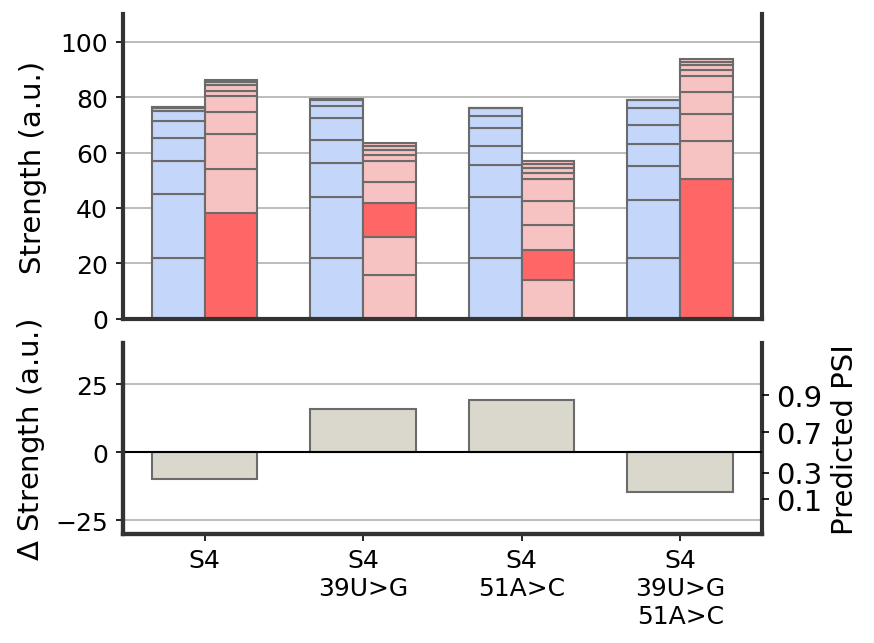

1/1 [==============================] - 0s 87ms/step


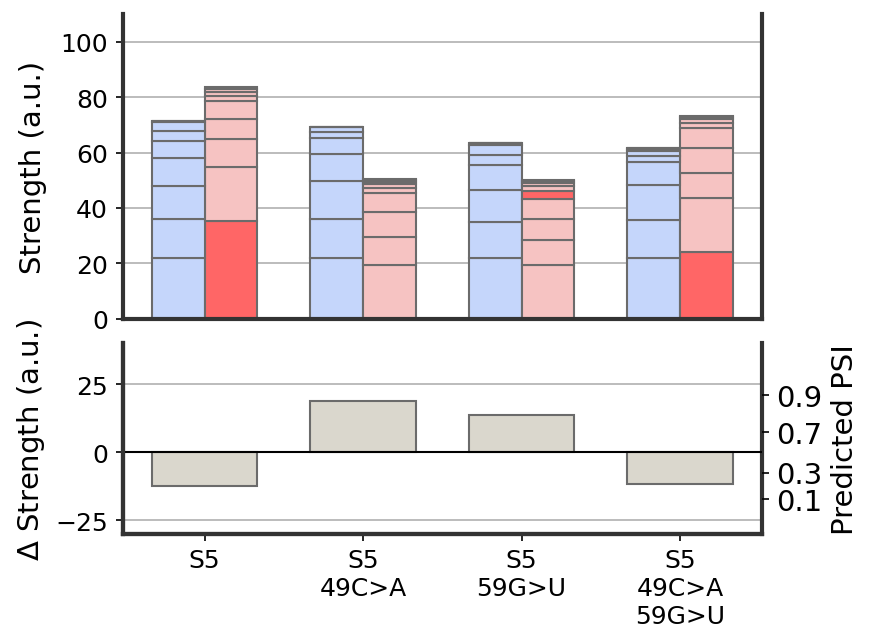

In [23]:
for structure_exons, annotations, filename_prefix in zip(structure_exon_sets, annotation_sets, filename_prefixes):

    highlight_forces = ['skip_struct_0_2_3']
  
    fig = force_plot.draw_force_plot([utils.add_flanking(e, 10) for e in structure_exons],
             annotations,
             highlight_forces=highlight_forces,
             draw_numbers=False, 
             ys=[0.1, 0.3, 0.7, 0.9, 0.975], height_ratios=[1.6, 1], delta_bar_width=2,
             vertical=True, sharex=True,
             vertical_adjustement=0.5,
             #parent_figure=fig,
             force_y_range=(0, 110), delta_force_y_range=(-30, 40),
             figsize=(5.5, 4.5)
            )    
    
    fig.subplots_adjust(hspace=0.1) # puts the Delta strength plot closer to the strength plot

    fig.savefig(f'./figs/{filename_prefix}.svg',
                transparent=True, pad_inches=0.1,
                bbox_inches='tight')
    
    plt.show()

## Also draw the secondary structure cartoon using computed saliency as colors 

In [24]:
from matplotlib import colors

In [31]:
def fill_array(indices, values, max_len=90):
    out = np.zeros(max_len)
    for i, v in zip(indices, values):
        out[int(i)] = v
    return out

In [32]:
def compute_contrib(seq, peak_hint, model, struct_activation_offset=2):
    inps = utils.create_input_data([seq])[:-1]
    inps_cat = np.concatenate(inps, axis=-1)

    cW, cB = model.get_layer('c_skip_struct').get_weights()
    pW, = model.get_layer('position_bias_skip_struct').get_weights()

    kernel_size, num_channels, num_filters = cW.shape

    b = tf.expand_dims(inps_cat, axis=(2,))
    v = tf.image.extract_patches(
                b,
                sizes=[1, cW.shape[0], 1, 1],
                strides=[1, 1, 1, 1],
                rates=[1, 1, 1, 1],
                padding="SAME",
            )
    w = tf.squeeze(v, axis=2).numpy().reshape(-1, inps_cat.shape[1], kernel_size, num_filters)
    tmp2 = np.einsum('abcd,cde->abcde', w, cW) + (cB / (kernel_size * num_channels)).reshape(1, 1, 1, 1, num_filters)
    tmp3 = tmp2 + (pW / (kernel_size * num_channels)).reshape(1, input_length, 1, 1, num_filters)
    
    offset = 10
    assert offset != 0
    saliency_location = tf.image.extract_patches(
                (offset + np.arange(inps_cat.shape[1])).reshape(1, -1, 1, 1),
                sizes=[1, kernel_size, 1, 1],
                strides=[1, 1, 1, 1],
                rates=[1, 1, 1, 1],
                padding="SAME",
            ).numpy().squeeze(axis=(0, 2))[struct_activation_offset+peak_hint]
    saliency_location = saliency_location.astype(float)
    saliency_location[saliency_location == 0] = np.nan
    saliency_location -= offset

    return tmp3, saliency_location
    
    
    
def normalize(x):
    if len(x.shape) == 1:
        return np.array(x) / np.array(x).max()
    if len(x.shape) == 2:
        return np.array(x) / np.array(x).max(axis=-1)[:, None]
    raise NotImplementedError('eee')
    
    
def compute_saliency(seq, peak_hint, model, loop_filters, struct_activation_offset=2):
    pos_bias_out, saliency_location = compute_contrib(seq, peak_hint, model,
                                                      struct_activation_offset=struct_activation_offset)
    pos_bias_loop = pos_bias_out[:, struct_activation_offset+peak_hint][..., loop_filters]
    filter_selector = (np.einsum('n w c f -> f', pos_bias_loop) > 0)
    print(loop_filters[filter_selector])
    sal_raw = np.einsum('n w c f -> w', pos_bias_loop[..., filter_selector])
    sal = fill_array(saliency_location, sal_raw)
    
    return sal


def saliency_to_hex(saliency, cm, scaling_fn): 
    snorm = scaling_fn(seq_saliency)
    
    return [colors.to_hex(cm(c)[:3]).upper() for c in snorm]


In [33]:
model_fname = f'custom_adjacency_regularizer_20210731_124_step3.h5'
model = tf.keras.models.load_model(model_fname)

In [34]:
structure_out_model = Model(inputs=model.inputs, outputs=[
    model.get_layer('activation_2').output,
    model.get_layer('activation_3').output
])



In [35]:
padded_exons = [
    utils.add_flanking(e[0], 10) for e in structure_exon_sets  # take the first exon from each quadruple, as that's the "wildtype" one
]



In [36]:
num_seq_filters = model.get_layer('qc_incl').kernel.shape[2]
num_struct_filters = model.get_layer('c_incl_struct').kernel.shape[2]
stem_loop_filters = np.array([0, 3, 2])
input_length = model.input[0].shape[1]

In [37]:
from scipy.signal import find_peaks
import draw_stem_loop

# Manually labels the stem loop regions
stem_loop_coordinates = [[37,56],[42,61],[40,61], [42,61], [52,69]]
stem_lengths = [6,6,7,6,6]

exons_to_plot_data = utils.create_input_data(padded_exons)
exons_incl_act, exons_skip_act = structure_out_model.predict(exons_to_plot_data[:-1] , verbose=1) # the last one is the structure which we don't need
exons_peak_hints = [find_peaks(exon_row, height=2)[
    0][0] for exon_row in exons_skip_act[..., num_seq_filters + stem_loop_filters].sum(axis=2)]


# first compute all the saliencies for all constructs; this way we can have consistent color bar for all
seq_saliencies = []
for seq, peak_hint in zip(tqdm(padded_exons), exons_peak_hints):
    seq_ss = utils.compute_structure([seq])[1][0]
    seq_saliencies.append(compute_saliency(seq, peak_hint, model, stem_loop_filters) + compute_saliency(seq, peak_hint-1, model, stem_loop_filters) + compute_saliency(seq, peak_hint+1, model, stem_loop_filters))

    
for seq, peak_hint, stem_loop_region, stem_length, filename_prefix,seq_saliency in zip(tqdm(padded_exons), exons_peak_hints, stem_loop_coordinates, stem_lengths, filename_prefixes, seq_saliencies):
    seq_ss = utils.compute_structure([seq])[1][0]
    norm = colors.TwoSlopeNorm(0, np.min(seq_saliencies), np.max(seq_saliencies)) # based on all saliencies of all exons
    saliency_colors = saliency_to_hex(seq_saliency, cm=plt.cm.bwr, scaling_fn=lambda x: norm(x).data)
    draw_stem_loop.draw_stem_loop(
        seq[stem_loop_region[0]:stem_loop_region[1]].replace("T","U"),
        stem_length,
        saliency_colors[stem_loop_region[0]:stem_loop_region[1]],
        f'figs/{filename_prefix}_cartoon.svg'
    )
        
    

1/1 [==============================] - 0s 90ms/step


 40%|██████████████████████                                 | 2/5 [00:00<00:00, 12.49it/s]

[0 2]
[0 2]
[0 2]
[0 2]
[]
[0 2]
[0]
[0]
[0]


100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 12.69it/s]


[0 2]
[0 2]
[0]
[0 2]
[2]
[0 2]


100%|███████████████████████████████████████████████████████| 5/5 [00:00<00:00, 32.16it/s]


[28, 428, 828, 1228, 1628]


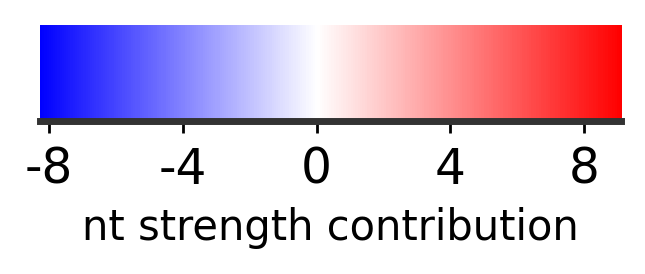

In [38]:
# Draw the color bar

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_yticks([])
    
fig, ax = plt.subplots(figsize=(3, 0.5), dpi=250)
a = np.outer(np.arange(norm.vmin, norm.vmax, 0.01), np.ones(10)).T
ax.imshow(a, aspect='auto', cmap=plt.cm.bwr, origin="lower", norm=norm)
simpleaxis(ax)
xlabels = [-8, -4, 0, 4, 8]
print([np.abs(a[0] - e).argmin() for e in xlabels])
ax.set_xticks([np.abs(a[0] - e).argmin() for e in xlabels])
ax.set_xticklabels(xlabels)
ax.set_xlabel('nt strength contribution', fontsize=12)
fig.savefig('./figs/secondary_structure_contribution_colorbar.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')
plt.show()

## Model explanation force plot (Fig S6)

1/1 [==============================] - 0s 89ms/step


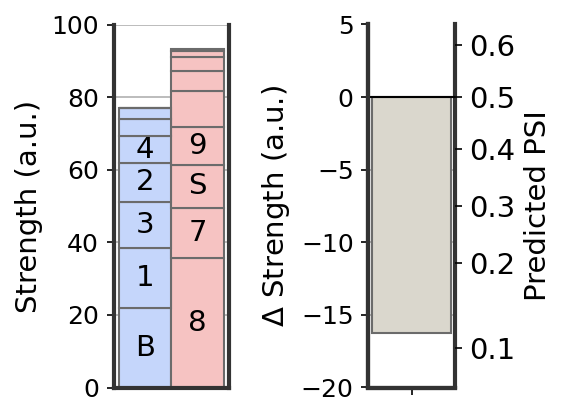

In [57]:
exons = ['GCGGCACCTACTACAATGTCCCCCGCTGCATACACTCGGAGCCAATAGGGCGCCTATAGAGTGTAGTCCT']
annotations = ['']



fig = force_plot.draw_force_plot([utils.add_flanking(e, 10) for e in exons],
                             annotations,
                             delta_force_y_range=(-20, 5), force_y_range=(0, 100), figsize=(4, 3),
                             draw_numbers=True, numbers_min_bar_height=6, delta_bar_width=2, width_ratios=[2,1.5,]
                            )

#axarr[-1].axis('off')
fig.tight_layout()
fig.savefig('./figs/exon.svg',
            transparent=True, pad_inches=0.1,
    bbox_inches='tight')